# Predicting house prices in King County, USA

### Data set information
Information was get from: https://www.kaggle.com/datasets/harlfoxem/housesalesprediction
This dataset contains house sale prices for King County, which includes Seattle. It includes information from homes sold between May 2014 and May 2015.

### Variable descriptions
| Variable      | Description                                                                                                 |
| ------------- | ----------------------------------------------------------------------------------------------------------- |
| id            | A notation for a house                                                                                      |
| date          | Date house was sold                                                                                         |
| price         | Price is prediction target                                                                                  |
| bedrooms      | Number of bedrooms                                                                                          |
| bathrooms     | Number of bathrooms                                                                                         |
| sqft_living   | Square footage of the home                                                                                  |
| sqft_lot      | Square footage of the lot                                                                                   |
| floors        | Total floors (levels) in house                                                                              |
| waterfront    | House which has a view to a waterfront                                                                      |
| view          | Has been viewed                                                                                             |
| condition     | How good the condition is overall                                                                           |
| grade         | overall grade given to the housing unit, based on King County grading system                                |
| sqft_above    | Square footage of house apart from basement                                                                 |
| sqft_basement | Square footage of the basement                                                                              |
| yr_built      | Built Year                                                                                                  |
| yr_renovated  | Year when house was renovated                                                                               |
| zipcode       | Zip code                                                                                                    |
| lat           | Latitude coordinate                                                                                         |
| long          | Longitude coordinate                                                                                        |
| sqft_living15 | Living room area in 2015(implies-- some renovations) This might or might not have affected the lotsize area |
| sqft_lot15    | LotSize area in 2015(implies-- some renovations)                                                            |


## Importing Libraries

In [11]:
import piplite
await piplite.install(['pandas','matplotlib','scikit-learn','seaborn', 'numpy'])

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler,PolynomialFeatures
from sklearn.linear_model import LinearRegression
%matplotlib inline
print("Done")

Done


## Importing Data Sets

In [30]:
# Link for the CSV file
file_name='https://docs.google.com/spreadsheets/d/e/2PACX-1vQ09KzbDukG0pSIGUZhEtEtju_X2XMZF4yJ_FvSTKMM7wry7chOy-m6DG-nbKZrukptkRu6M7SJWn1i/pub?gid=1567461234&single=true&output=csv'

In [31]:
#Create the download function to get the dataset
from pyodide.http import pyfetch

async def download(url, filename):
    response = await pyfetch(url)
    if response.status == 200:
        with open(filename, "wb") as f:
            f.write(await response.bytes())

In [32]:
#Download the file from the link
await download(file_name, "kc_house_data_NaN.csv")
file_name="kc_house_data_NaN.csv"

#Load the data to a dataframe
df = pd.read_csv(file_name)

#Show the first 5 rows of the dataframe
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900,3.0,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000,3.0,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000,2.0,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000,4.0,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000,3.0,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [35]:
#Display the columns data types
df.dtypes

id                 int64
date              object
price              int64
bedrooms         float64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15        object
dtype: object

In [36]:
# Stadistical summary of the non-binary variables
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15
count,2.161300e+04,2.161300e+04,21600.000000,21603.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.372870,2.115736,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492
std,2.876566e+09,3.671272e+05,0.926657,0.768996,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304
min,1.000102e+06,7.500000e+04,1.000000,0.500000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000


## Data Wrangling

In [40]:
#Let's drop the id columns from the original dataframe
df.drop(['id'], axis=1, inplace = True) 

In [42]:
#Let's see if there are missing values in the dataframe
missing_values = df.isna().sum() 
missing_values

date              0
price             0
bedrooms         13
bathrooms        10
sqft_living       0
sqft_lot          0
floors            0
waterfront        0
view              0
condition         0
grade             0
sqft_above        0
sqft_basement     0
yr_built          0
yr_renovated      0
zipcode           0
lat               0
long              0
sqft_living15     0
sqft_lot15        0
dtype: int64

In [46]:
#Replace the missing values from the beddrooms and bathrooms columns with the mean

df['bedrooms'].replace(np.nan, df['bedrooms'].mean(), inplace=True)
df['bathrooms'].replace(np.nan, df['bathrooms'].mean(), inplace=True)
missing_values

date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

## Exploratory Data Analysis

In [48]:
#Find the correlation of all columns with the price column and sort by value (descending)
df.corr()['price'].sort_values(ascending= False)

<ipython-input-48-df5086c58d26>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()['price'].sort_values(ascending= False)#find the corr of all columns with a certain column and sort by value (descending)


price            1.000000
sqft_living      0.702035
grade            0.667434
sqft_above       0.605567
sqft_living15    0.585379
bathrooms        0.525738
view             0.397293
sqft_basement    0.323816
bedrooms         0.308797
lat              0.307003
waterfront       0.266369
floors           0.256794
yr_renovated     0.126434
sqft_lot         0.089661
yr_built         0.054012
condition        0.036362
long             0.021626
zipcode         -0.053203
Name: price, dtype: float64

<AxesSubplot:xlabel='grade', ylabel='price'>

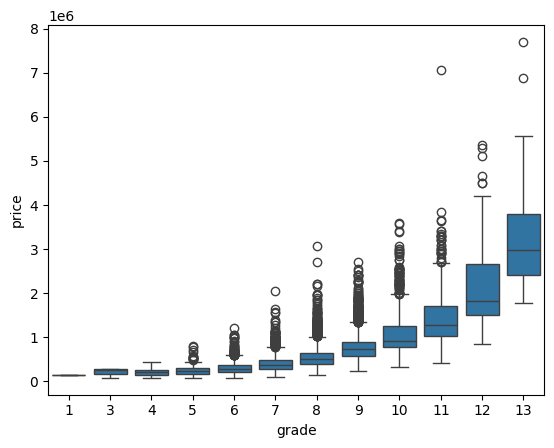

In [64]:
sns.boxplot(x='grade', y='price', data=df) #shows the boxplot of a columns 

<AxesSubplot:xlabel='sqft_living', ylabel='price'>

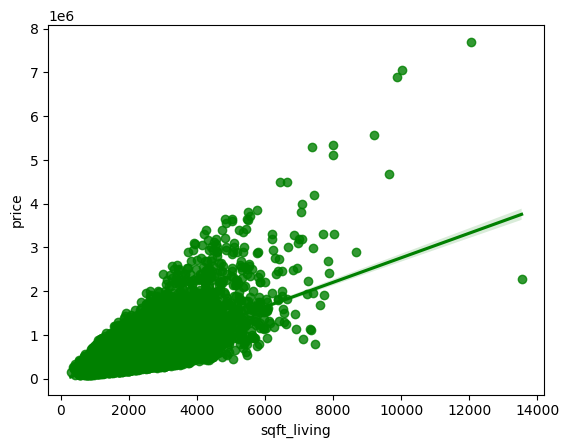

In [61]:
sns.regplot (x= 'sqft_living', y='price', data=df, color = 'green') #shows a graphic with the corr line and the ponints

### It seems that the variables that will have a bigger impact in the modeling are Square footage of the home and the overall grade given to the housing unit, based on King County grading system, both with a positive correlated to the price

## Model Development

### Linear Regression Model

In [92]:
X = df[['sqft_living']]
Y = df['price']
lm = LinearRegression()
lm.fit(X,Y)
#Calculate the R^2 of the model
lm.score(X, Y)

0.4928532179037931

#### Import the libraries

In [103]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
print("done")

done


In [104]:

features =df[["floors", "waterfront","lat" ,"bedrooms" ,"sqft_basement" ,"view" ,"bathrooms","sqft_living15","sqft_above","grade","sqft_living"]]     
X = features
Y = df['price']

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.15, random_state=1)
print('test:', x_test.shape[0], '|', 'training:', x_train.shape[0])

test: 3242 | training: 18371


### Multiple Linear Regression Model

In [120]:
#Fit the model using the whole dataset
features =df[["floors", "waterfront","lat" ,"bedrooms" ,"sqft_basement" ,"view" , "bathrooms", "sqft_living15", "sqft_above", "grade","sqft_living"]]    
Y = df['price']

mlm1=LinearRegression()
mlm1.fit(features, Y)

#Fit the model using the test and train data
mlm2=LinearRegression()
mlm2.fit(x_train, y_train)

#Comparing the results
print("All Data Score:", mlm1.score(features,Y), "|", "Data Split Score:", mlm2.score(x_test, y_test))

All Data Score: 0.6576908209986729 | Data Split Score: 0.6478399456402969


### Model using Pipelines

In [123]:
#Create a tuple
Input=[('scale',StandardScaler()),('polynomial', PolynomialFeatures(include_bias=False)), ('model',LinearRegression())]

#Input the list in the pipeline contructor
Pipe1 = Pipeline(Input)
Pipe2 = Pipeline(Input)

#Train the model using the whole dataset
Pipe1.fit(features,Y)

#Train the model using the test and train data
Pipe2.fit(x_train, y_train)

#Calculate R^2
print("All Data Score:", Pipe1.score(features,Y), "|", "Data Split Score:", Pipe2.score(x_test, y_test))


All Data Score: 0.7464963995409689 | Data Split Score: 0.7093666215671992


## Model Evaluation and REFINEMENT

### Create and fit a Ridge regression object
Regularization parameter set to 0.1

In [130]:
from sklearn.linear_model import Ridge
Ridge_Model = Ridge(alpha=0.1)
Ridge_Model.fit(x_train,y_train)
Ridge_Model.score(x_test,y_test)

0.6478759163939072

### Second Order Polynomial transform

In [129]:
# Perform a second-order polynomial transformation
poly = PolynomialFeatures(degree=2)
x_train_poly = poly.fit_transform(x_train)
x_test_poly = poly.transform(x_test)

# Create and fit a Ridge regression model
Ridge_Model2 = Ridge(alpha=0.1)
Ridge_Model2.fit(x_train_poly, y_train)

# Calculate the R^2 score using the test data
Ridge_Model2.score(x_test_poly, y_test)

0.7002744277481011

In [141]:
Linear_scores = [lm.score(X,Y)]
Multiple_scores = [mlm2.score(x_test, y_test)]
Ridge_scores = [Ridge_Model.score(x_test,y_test)]
Pipeline_scores = [Pipe2.score(x_test, y_test)]
SecondOrder_scores = [Ridge_Model2.score(x_test_poly, y_test)]


Report = {
    'Model': ['Linear Regression', 'Multiple Linear Regression', 'Pipelines', 'Ridge Regressions', 'Second Order Polynomial regression'],
    'Accuracy Score': [Linear_scores[0] , Multiple_scores[0],Pipeline_scores[0], Ridge_scores[0], SecondOrder_scores[0]],
}

table = pd.DataFrame(Report)
print(table)

                                Model  Accuracy Score
0                   Linear Regression        0.657691
1          Multiple Linear Regression        0.647840
2                           Pipelines        0.709367
3                   Ridge Regressions        0.647876
4  Second Order Polynomial regression        0.700274


## Conclusion

Based on the analysis of five different models for predicting house prices in King County, the pipeline constructor model emerged as the strongest performer with an R^2 value of 70.9%. This indicates that utilizing a structured data preparation process prior to modeling significantly improved prediction accuracy. While second-order polynomial regressions achieved an R^2 of 70.0%, their performance was marginally less consistent than the pipeline model.

Square footage and the overall housing unit grade assigned by the King County system were the most influential variables affecting house prices in this dataset. This suggests that both the size and the structural quality of the property play a crucial role in determining its market value.

### Juan Camilo Pina